# Preliminar analysis

In [1]:
# Carga de paquetes
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy import stats
from collections import defaultdict, OrderedDict
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from scipy.special import rel_entr
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from matplotlib.backends.backend_pdf import PdfPages
import functions_analysis as func
import pprint
import matplotlib.lines as mlines  

In [2]:
files_names = [
    ['barnase_A', 3, ['0.25', '20.0', '480.0'],[1,2,3]],
    ['alpha_lactalbumin_apo', 2, ['0.25', '20.0',  '480.0'],[1,2,3]],
    [ 'm_lipin', 461, ['0.05', '0.5', '5.0', '50.0'],[1,2,3]],
    ['alpha_spectrin', 1, ['0.005', '5.0', '5666.67'],[1,2,3]],
    ['enolase_apo', 1, ['0.25', '20.0', '480.0'],[1,2,3]],
    [ 'secB', 9, [ '0.167', '5.0', '100.000008'],[1,2,3]],
     [ 'VDR_AF_apo', 3, [ '0.5', '3.0', '30.0'],[1,2,3]],
    ['halm2_AF_apo',1,[ '0.5', '5.0',
       '240.000015'],[1,2,3]]
]

### RMSD

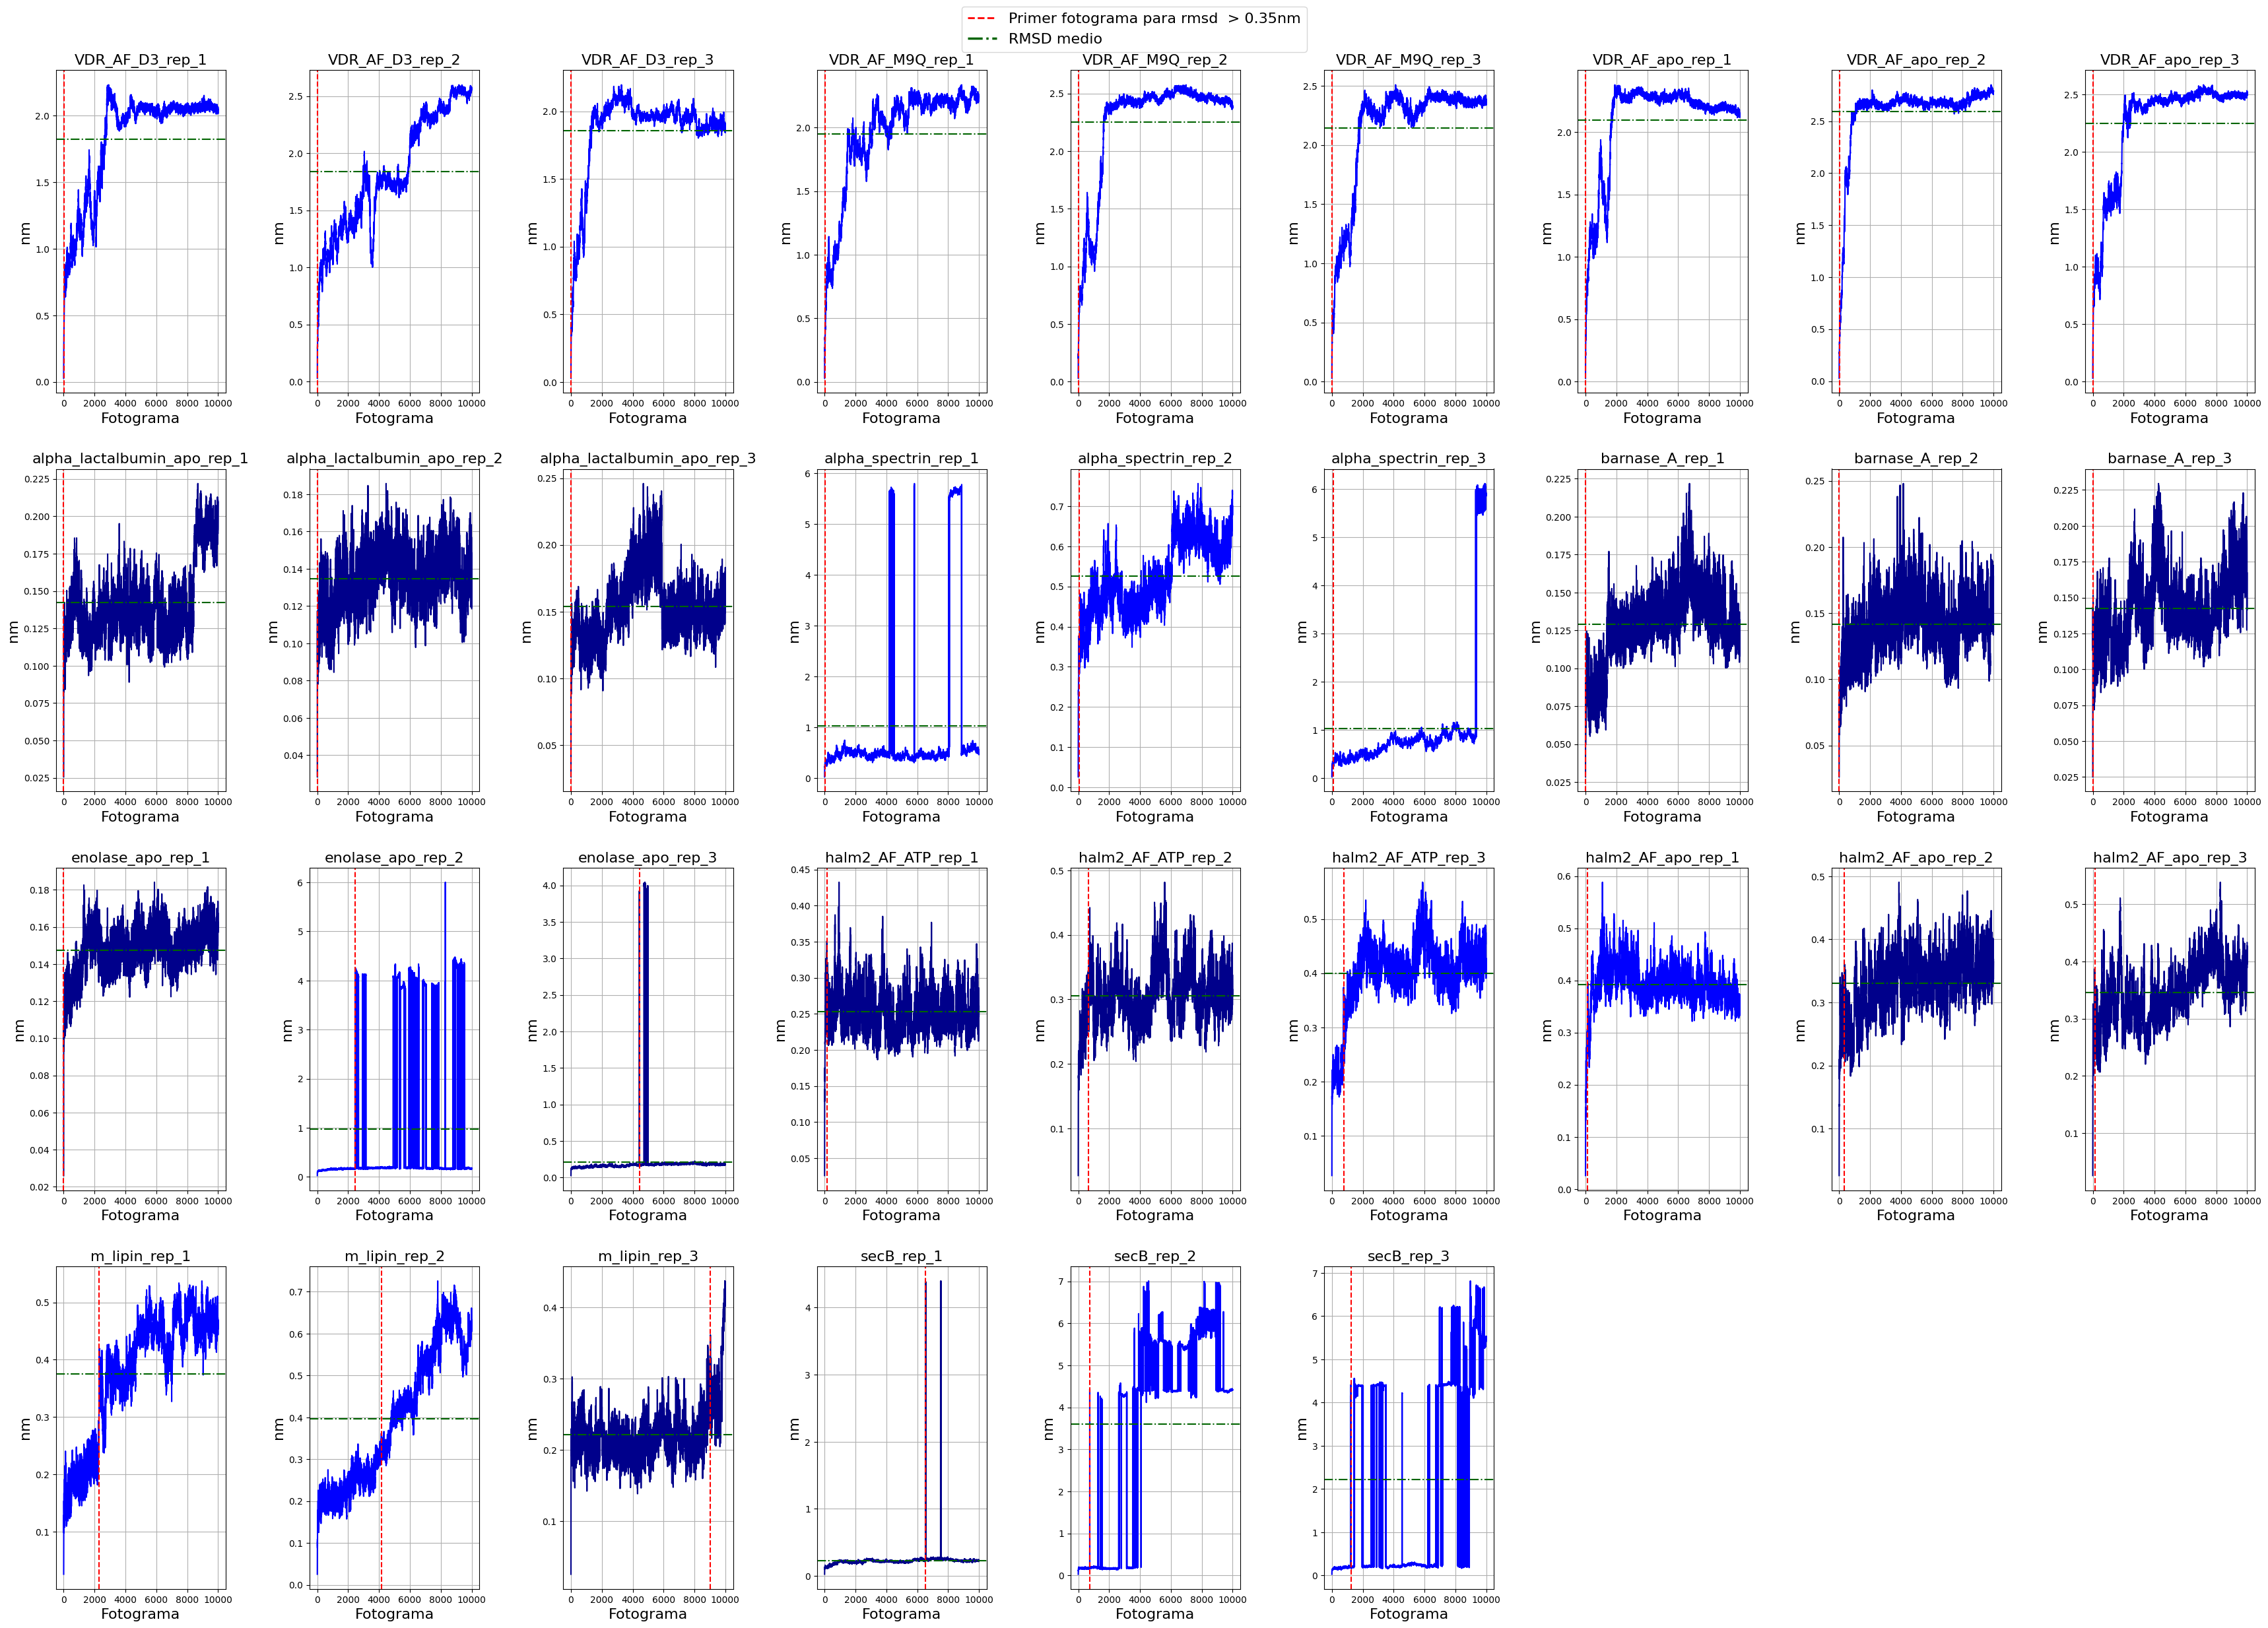

In [3]:
func.rms_plots('/home/carlotaalv/Escritorio/TFM/tfm/bonds','_descriptors_data.pkl','rmsd')      

### RMSF

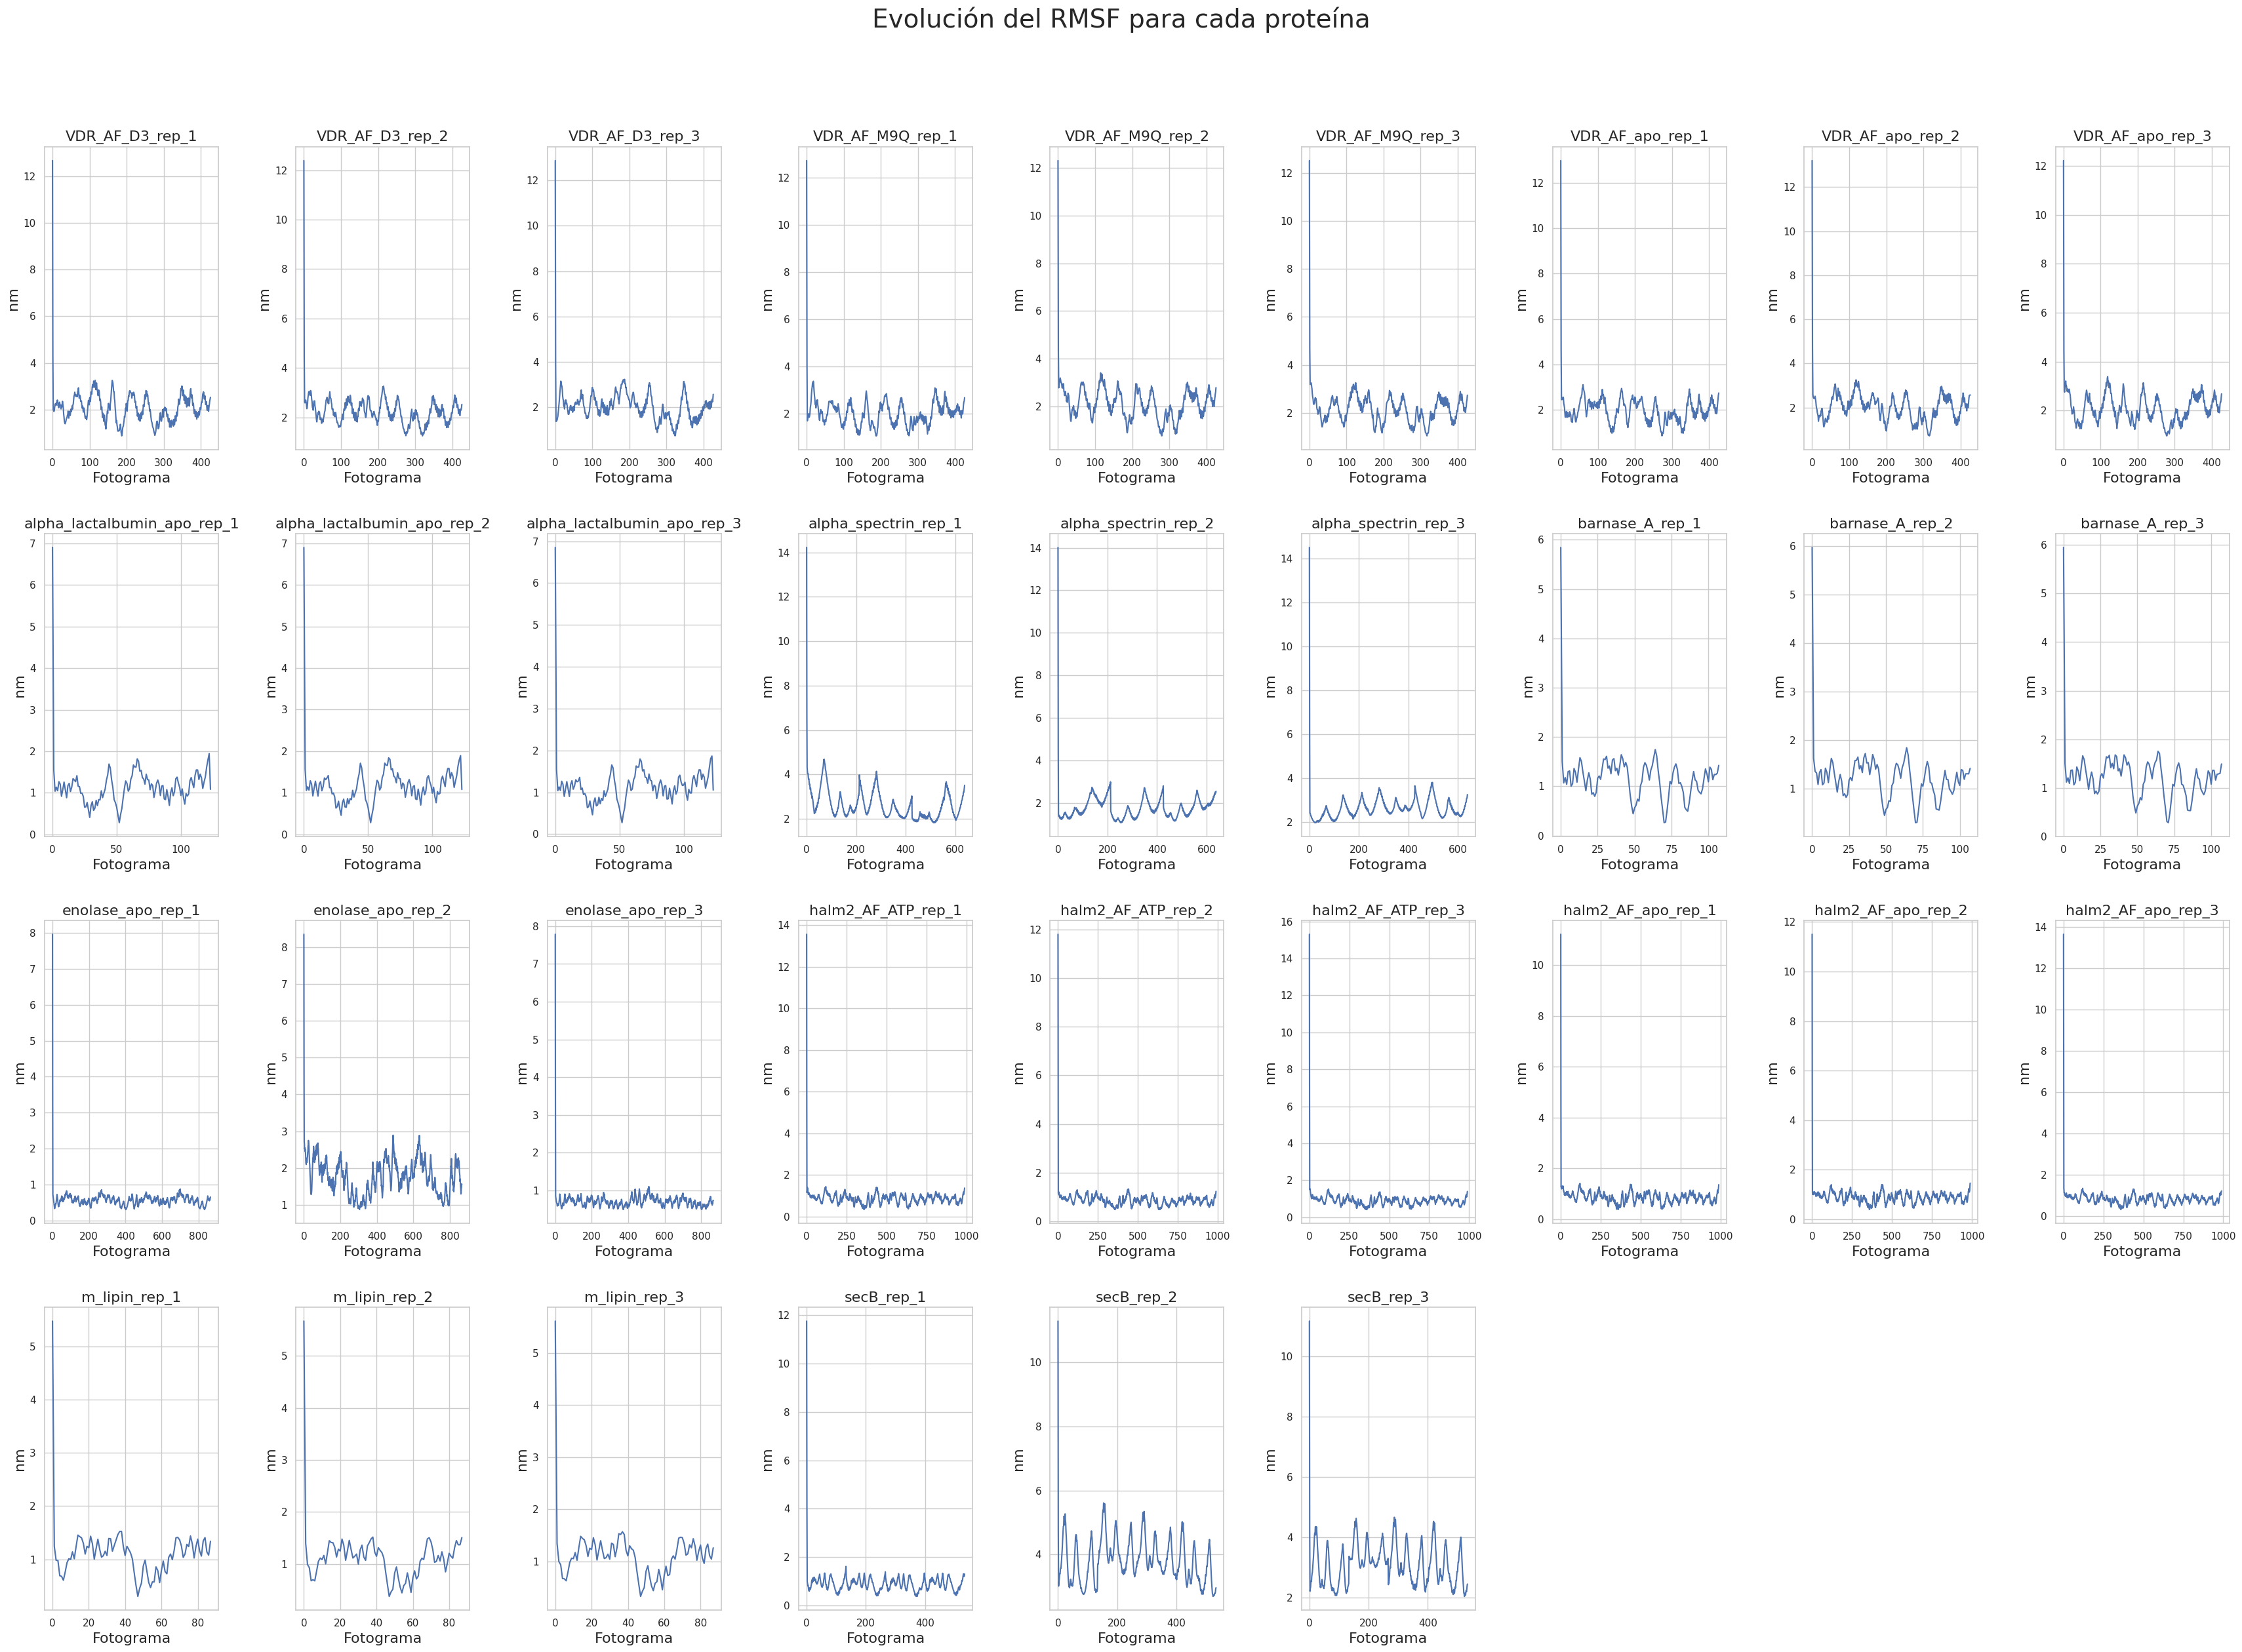

In [91]:
func.rms_plots('/home/carlotaalv/Escritorio/TFM/tfm/bonds','_descriptors_data.pkl','rmsf')

### Distribution of hydrogen bonds scores


In [4]:
files_names = [
    ['barnase_A', 3, ['0.25', '1.0', '5.0', '20.0', '60.0', '240.0', '480.0'],[1,2,3]],
    ['alpha_lactalbumin_apo', 2, ['0.25', '1.0', '5.0', '20.0', '60.0', '240.0', '480.0'],[1,2,3]],
    [ 'm_lipin', 461, ['0.05', '0.5', '5.0', '50.0'],[1,2,3]],
    ['alpha_spectrin', 1, ['0.005', '0.02', '0.05', '0.17', '0.5', '1.67', '5.0', '16.67', '50.0', '166.67', '500.0', '1666.67', '4166.67', '5666.67'],[1,2,3]],
    ['enolase_apo', 1, ['0.25', '1.0', '5.0', '20.0', '60.0', '240.0', '480.0'],[1,2,3]],
    [ 'secB', 9, ['0.0', '0.167', '0.5', '1.0', '5.0', '10.0', '100.000008'],[1,2,3]],
     [ 'VDR_AF_apo', 3, ['0.0', '0.5', '1.0', '3.0', '10.0', '30.0'],[1,2,3]],
    ['halm2_AF_apo',1,['0.0', '0.5', '5.0', '30.000002',
       '240.000015'],[1,2,3]]
]
files_names = [

    [ 'secB', 9, [  '5.0'],[1]]
]

for base_name,nt_correction,time_values,replicates in files_names:
  
  for replicate in replicates:

      trj_file = f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_rep_{replicate}_bonds_prot.pkl' 
      topology_file=f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_topology.csv'
      topology = pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_topology.csv')

¡      bonds_values_geometric=func.hbonds_per_res(trj_file,nt_correction,topology_file,'geometric',em=False)
      bonds_values_geometric_gauss=func.hbonds_per_res(trj_file,nt_correction,topology_file,'geometric_gauss',em=False)
      bonds_values_elect=func.hbonds_per_res(trj_file,nt_correction,topology_file,'electrostatic',em=False)
      func.distribution_hbonds(bonds_values_geometric, bonds_values_geometric_gauss,bonds_values_elect,topology,nt_correction,base_name,replicate,save_dir=None)
    

## Selection of thee best parameter to summarized the values of the hbonds


In [ ]:
files_names = [
    ['barnase_A', 3, ['5.0'],[1,2,3]],
    ['alpha_lactalbumin_apo', 2, ['5.0'],[1,2,3]],
    [ 'm_lipin', 461, [ '5.0'],[1,2,3]],
    ['alpha_spectrin', 1, [ '5.0'],[1,2,3]],
    ['enolase_apo', 1, ['5.0'],[1,2,3]],
    [ 'secB', 9, [  '5.0'],[1,2,3]],
     [ 'VDR_AF_apo', 3, [ '3.0'],[1,2,3]],
    ['halm2_AF_apo',1,['5.0'],[1,2,3]]
]
files_names = [
    ['barnase_A', 3, ['0.25', '5.0', '480.0'],[1,2,3]],
    ['alpha_lactalbumin_apo', 2, ['0.25', '5.0',  '480.0'],[1,2,3]],
    [ 'm_lipin', 461, ['0.05', '5.0', '50.0'],[1,2,3]],
    ['alpha_spectrin', 1, ['0.005', '5.0', '5666.67'],[1,2,3]],
    ['enolase_apo', 1, ['0.25', '5.0', '480.0'],[1,2,3]],
    [ 'secB', 9, [ '0.167', '5.0', '100.000008'],[1,2,3]],
     [ 'VDR_AF_apo', 3, [ '0.5', '3.0', '30.0'],[1,2,3]],
    ['halm2_AF_apo',1,[ '0.5', '5.0',
       '240.000015'],[1,2,3]]
]
columns=['Protein','replicate','score_type','time_value','Y','Y_value','X','X_value','mse','mae','r2']
results_df=pd.DataFrame(columns=columns)
corr_data={}
for base_name,nt_correction,time_values,replicates in files_names:
  for type_score in ['geometric','geometric_gauss','electrostatic']: 

    for replicate in replicates:
      trj_file = f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_rep_{replicate}_bonds_prot.pkl' 
      topology_file=f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_topology.csv'
      topology = pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_topology.csv')

      bonds=func.hbonds_per_res(trj_file,nt_correction,topology_file,type_score,em=False)
      D_uptake_noproc=pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/HDX_data/{base_name}_HDX.csv')
      D_uptake=func.unpivot_Duptake(D_uptake_noproc)
      gibbs=pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/gibbs/{base_name}_gibbs.csv',header=None)
      gibbs_processed=func.gibbs_proc(gibbs)
      results_df,corr_data=func.comparasion_parameter(D_uptake,gibbs_processed,bonds,time_values,type_score,replicate,base_name,results_df,corr_data)


/home/carlotaalv/Escritorio/TFM/tfm/functions_analysis.py:1618: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df= pd.concat([results_df, new_rows], ignore_index=True)


In [ ]:

with open('results_parameter_search.pkl','wb') as file:
    pickle.dump(results_df,file)
with open('corr_data_parameter_search.pkl','wb') as file:
    pickle.dump(corr_data,file)
    

In [2]:
with open('results_parameter_search.pkl','rb') as file:
    params_results=pickle.load(file)
with open('corr_data_parameter_search.pkl','rb') as file:
    paramas_corr=pickle.load(file)
    

In [3]:
min_y_gibbs = params_results[params_results['Y'] == 'gibbs']['Y_value'].apply(min).min()
max_y_gibbs = params_results[params_results['Y'] == 'gibbs']['Y_value'].apply(max).max()
min_y_Duptake = params_results[params_results['Y'] == 'D uptake']['Y_value'].apply(min).min()
max_y_Duptake= params_results[params_results['Y'] == 'D uptake']['Y_value'].apply(max).max()

print(f"Y range for gibbs: {min_y_gibbs} to {max_y_gibbs}")
print(f"Y range for D uptake: {min_y_Duptake} to {max_y_Duptake}")
range_gibbs=max_y_gibbs-min_y_gibbs
range_uptake=max_y_Duptake-min_y_Duptake

Y range for gibbs: 0.0 to 41201.560000000005
Y range for D uptake: -0.189141 to 39.67348565


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
params_results.columns=['Protein', 'replicate', 'Tipo de puntuación', 'time_value', 'Datos experimentales', 'Y_value', 'Parámetros','X_value', 'mse', 'mae', 'r2']
params_results['Datos experimentales'] = params_results['Datos experimentales'].replace({
    'gibbs': 'dG',
    'D uptake': 'Deuterio Incorporado'
})
params_results['Parámetros'] = params_results['Parámetros'].replace({
    'median': 'Mediana',
    'mean': 'Media',
    'interquartile':'Interquartil',
    'quartile 75':'Quartil 75',
    'quartile 90':'Quartil 90',
    'mode':'Moda'
})
params_results['Tipo de puntuación'] = params_results['Tipo de puntuación'].replace({
    'geometric': 'Geométrica',
    'geometric_gauss': 'Gaussiana',
    'electrostatic':'Electrostática'
})

params_results['Tipo de puntuación'] = params_results['Tipo de puntuación'].apply(
    lambda x: ', '.join(map(str, x)) if isinstance(x, set) else str(x)
)
params_results['Tipo de puntuación'] = params_results['Tipo de puntuación'].replace({
    'geometric': 'Geométrica',
    'geometric_gauss': 'Gaussiana',
    'electrostatic':'Electrostática'
})

In [11]:
params_results          

,Protein,replicate,Tipo de puntuación,time_value,Datos experimentales,Y_value,Parámetros,X_value,mse,mae,r2,Range,MSE normalizado,MAE normalizado
0,barnase_A,1,Geométrica,0.25,dG,"[11641.452857142856, 14899.146666666667, 18686...",Mediana,"[[0.0], [0.011166765726235338], [0.22023421681...",8.321876e+06,2303.062609,0.703618,41201.560000,201.979638,0.055897
1,barnase_A,1,Geométrica,0.25,Deuterio Incorporado,"[0.608212928, 0.599661877, 0.422250721, 0.3282...",Mediana,"[[0.0], [0.011166765726235338], [0.22023421681...",1.485152e-02,0.103945,0.451978,39.862627,0.000373,0.002608
2,barnase_A,1,Geométrica,0.25,dG,"[11641.452857142856, 14899.146666666667, 18686...",Media,"[[0.0016030767985437747], [0.02861951977983729...",5.197654e+06,1824.000997,0.814886,41201.560000,126.151866,0.044270
3,barnase_A,1,Geométrica,0.25,Deuterio Incorporado,"[0.608212928, 0.599661877, 0.422250721, 0.3282...",Media,"[[0.0016030767985437747], [0.02861951977983729...",1.258306e-02,0.095696,0.535684,39.862627,0.000316,0.002401
4,barnase_A,1,Geométrica,0.25,dG,"[11641.452857142856, 14899.146666666667, 18686...",Quartil 75,"[[0.0], [0.04629271765334083], [0.284719538240...",8.139321e+06,2455.896885,0.710119,41201.560000,197.548865,0.059607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,halm2_AF_apo,3,Electrostática,240.000015,Deuterio Incorporado,"[4.348443, 3.88757, 0.887988, 0.202144, 0.0014...",Quartil 90,"[[0.4786453987405265], [0.4985889570213818], [...",1.673841e+00,0.985621,0.029951,39.862627,0.041990,0.024725
2588,halm2_AF_apo,3,Electrostática,240.000015,dG,"[13861.2988, 14438.852916666665, 15878.0755555...",Interquartil,"[[0.4684894384076948], [0.4880098316746821], [...",5.462378e+07,6638.807287,0.061837,41201.560000,1325.769612,0.161130
2589,halm2_AF_apo,3,Electrostática,240.000015,Deuterio Incorporado,"[4.348443, 3.88757, 0.887988, 0.202144, 0.0014...",Interquartil,"[[0.4684894384076948], [0.4880098316746821], [...",1.673610e+00,0.985565,0.030085,39.862627,0.041984,0.024724
2590,halm2_AF_apo,3,Electrostática,240.000015,dG,"[13861.2988, 14438.852916666665, 15878.0755555...",Moda,"[[0.4684894384076948], [0.4880098316746821], [...",5.462378e+07,6638.807287,0.061837,41201.560000,1325.769612,0.161130


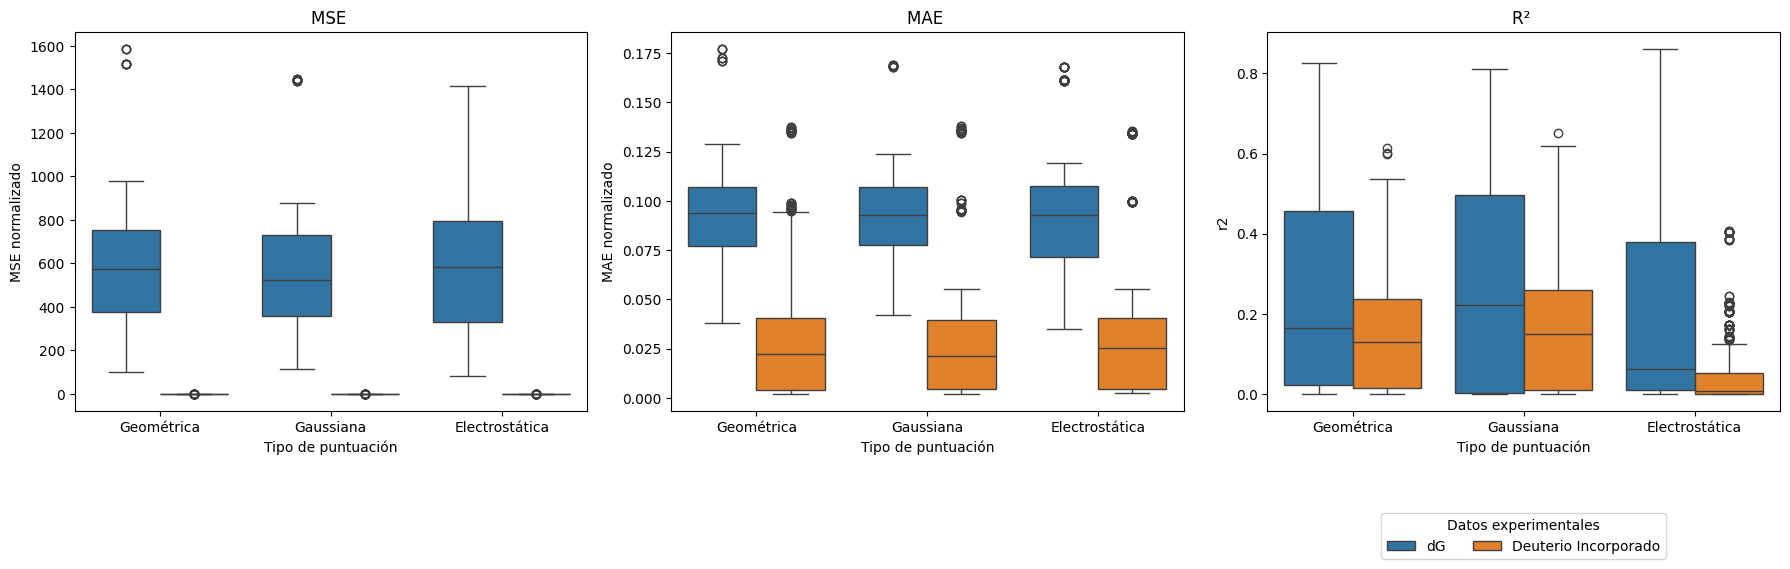

In [14]:
params_results['Range'] = np.where(params_results['Datos experimentales'] == 'dG', range_gibbs, range_uptake)
params_results['MSE normalizado'] = params_results['mse'] / params_results['Range']
params_results['MAE normalizado'] = params_results['mae'] / params_results['Range']
## PLOTS Type of score
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=params_results, x='Tipo de puntuación', y='MSE normalizado', hue='Datos experimentales')
plt.title('MSE ')
plt.gca().legend_.remove()
plt.subplot(1, 3, 2)
sns.boxplot(data=params_results, x='Tipo de puntuación', y='MAE normalizado', hue='Datos experimentales')
plt.title('MAE ')
plt.gca().legend_.remove()
plt.subplot(1, 3, 3)
sns.boxplot(data=params_results, x='Tipo de puntuación', y='r2', hue='Datos experimentales')
plt.title('R² ')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2, title="Datos experimentales")
plt.tight_layout()
plt.show()


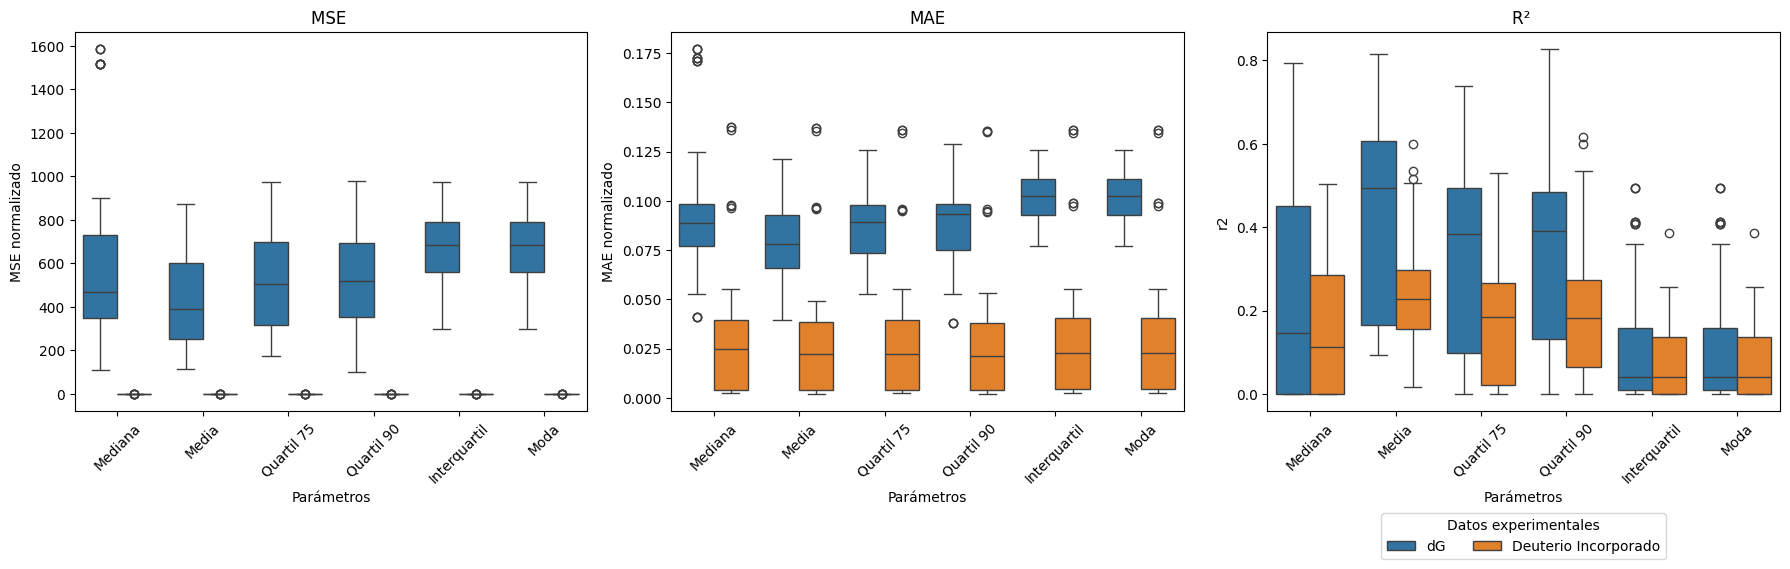

In [17]:
filtered_data = params_results[params_results['Tipo de puntuación'] == 'Geométrica']
## PLOTS Type of parameter for data with best score
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
# MSE Comparison by score_type and Y
sns.boxplot(data=filtered_data, x='Parámetros', y='MSE normalizado', hue='Datos experimentales')
plt.xticks(rotation=45)  # Rotate labels 45 degrees
plt.title('MSE ')  
plt.gca().legend_.remove()

# MAE Comparison by score_type and Y
plt.subplot(1, 3, 2)
sns.boxplot(data=filtered_data, x='Parámetros', y='MAE normalizado', hue='Datos experimentales')
plt.xticks(rotation=45)  # Rotate labels 45 degrees
plt.title('MAE')
plt.gca().legend_.remove()

# R² Comparison by score_type and Y
plt.subplot(1, 3, 3)
sns.boxplot(data=filtered_data, x='Parámetros', y='r2', hue='Datos experimentales')
plt.xticks(rotation=45)  # Rotate labels 45 degrees
plt.title('R² ')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2,title="Datos experimentales")
plt.tight_layout()
plt.show()


## Bayesian vs Parameter

In [ ]:
files_names = [
    ['barnase_A', 3, ['0.25', '5.0', '480.0'],[1,2,3]],
    ['alpha_lactalbumin_apo', 2, ['0.25', '5.0',  '480.0'],[1,2,3]],
    [ 'm_lipin', 461, ['0.05', '5.0', '50.0'],[1,2,3]],
    ['alpha_spectrin', 1, ['0.005', '5.0', '5666.67'],[1,2,3]],
    ['enolase_apo', 1, ['0.25', '5.0', '480.0'],[1,2,3]],
    [ 'secB', 9, [ '0.167', '5.0', '100.000008'],[1,2,3]],
     [ 'VDR_AF_apo', 3, [ '0.5', '3.0', '30.0'],[1,2,3]],
    ['halm2_AF_apo',1,[ '0.5', '5.0',
       '240.000015'],[1,2,3]]
]

columns=['Protein','replicate','score_type','time_value','Y','Y_value','X','X_value','mse','mae','r2']
results_df=pd.DataFrame(columns=columns)
corr_data={}
for base_name,nt_correction,time_values,replicates in files_names:
  for type_score in ['geometric_gauss','geometric']: 

    for replicate in replicates:
      trj_file = f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_rep_{replicate}_bonds_prot.pkl' 
      topology_file=f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_topology.csv'
      topology = pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_topology.csv')

      bonds=func.hbonds_per_res(trj_file,nt_correction,topology_file,type_score,em=False)
      D_uptake_noproc=pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/HDX_data/{base_name}_HDX.csv')
      D_uptake=func.unpivot_Duptake(D_uptake_noproc)
      gibbs=pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/gibbs/{base_name}_gibbs.csv',header=None)
      gibbs_processed=func.gibbs_proc(gibbs)
      results_df,corr_data=func.final_comparision_peptidev2(D_uptake,gibbs_processed,bonds,time_values,type_score,replicate,base_name,results_df,corr_data)
  

/home/carlotaalv/Escritorio/TFM/tfm/functions_analysis.py:1181: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df= pd.concat([results_df, new_rows], ignore_index=True)
/home/carlotaalv/mambaforge/envs/tfm/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:375: RuntimeWarning: invalid value encountered in sqrt
  y_std = np.sqrt(sigmas_squared_data + (1.0 / self.alpha_))
/home/carlotaalv/mambaforge/envs/tfm/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:375: RuntimeWarning: invalid value encountered in sqrt
  y_std = np.sqrt(sigmas_squared_data + (1.0 / self.alpha_))
/home/carlotaalv/mambaforge/envs/tfm/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:375: RuntimeWarning: invalid value encountered in sqrt


In [ ]:
os.chdir('Analysis')
with open('results_parameterVSbayes_search.pkl','wb') as file:
    pickle.dump(results_df,file)
    
with open('corr_data_parameterVSbayes_search.pkl','wb') as file:
    pickle.dump(corr_data,file)
    

In [23]:
os.chdir('bonds')

In [25]:
with open('results_parameterVSbayes_search.pkl','rb') as file:
    results_bayes=pickle.load(file)
    
with open('corr_data_parameterVSbayes_search.pkl','rb') as file:
    bayes_corr=pickle.load(file)
    

In [25]:
min_y_gibbs = results_bayes[results_bayes['Y'] == 'gibbs']['Y_value'].apply(min).min()
max_y_gibbs = results_bayes[results_bayes['Y'] == 'gibbs']['Y_value'].apply(max).max()
min_y_Duptake = results_bayes[results_bayes['Y'] == 'D uptake']['Y_value'].apply(min).min()
max_y_Duptake= results_bayes[results_bayes['Y'] == 'D uptake']['Y_value'].apply(max).max()

print(f"Y range for gibbs: {min_y_gibbs} to {max_y_gibbs}")
print(f"Y range for D uptake: {min_y_Duptake} to {max_y_Duptake}")
range_gibbs=max_y_gibbs-min_y_gibbs
range_uptake=max_y_Duptake-min_y_Duptake

Y range for gibbs: 0.0 to 41201.560000000005
Y range for D uptake: -0.189141 to 39.67348565


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
results_bayes.columns=['Protein', 'replicate', 'Tipo de puntuación', 'time_value', 'Datos experimentales', 'Y_value', 'Parámetros','X_value', 'mse', 'mae', 'r2']
results_bayes['Datos experimentales'] = results_bayes['Datos experimentales'].replace({
    'gibbs': 'dG',
    'D uptake': 'Deuterio Incorporado'
})
results_bayes['Parámetros'] = results_bayes['Parámetros'].replace({
    'mean': 'Media',
    'bayesian':'Todos los valores'
})
results_bayes['Tipo de puntuación'] = results_bayes['Tipo de puntuación'].replace({
    'geometric': 'Geométrica',
    'geometric_gauss': 'Gaussiana',
})

results_bayes['Tipo de puntuación'] = results_bayes['Tipo de puntuación'].apply(
    lambda x: ', '.join(map(str, x)) if isinstance(x, set) else str(x)
)
results_bayes['Tipo de puntuación'] = results_bayes['Tipo de puntuación'].replace({
    'geometric': 'Geométrica',
    'geometric_gauss': 'Gaussiana',
})
filtered_data_bayes = results_bayes[results_bayes['Tipo de puntuación'] == 'Geométrica']


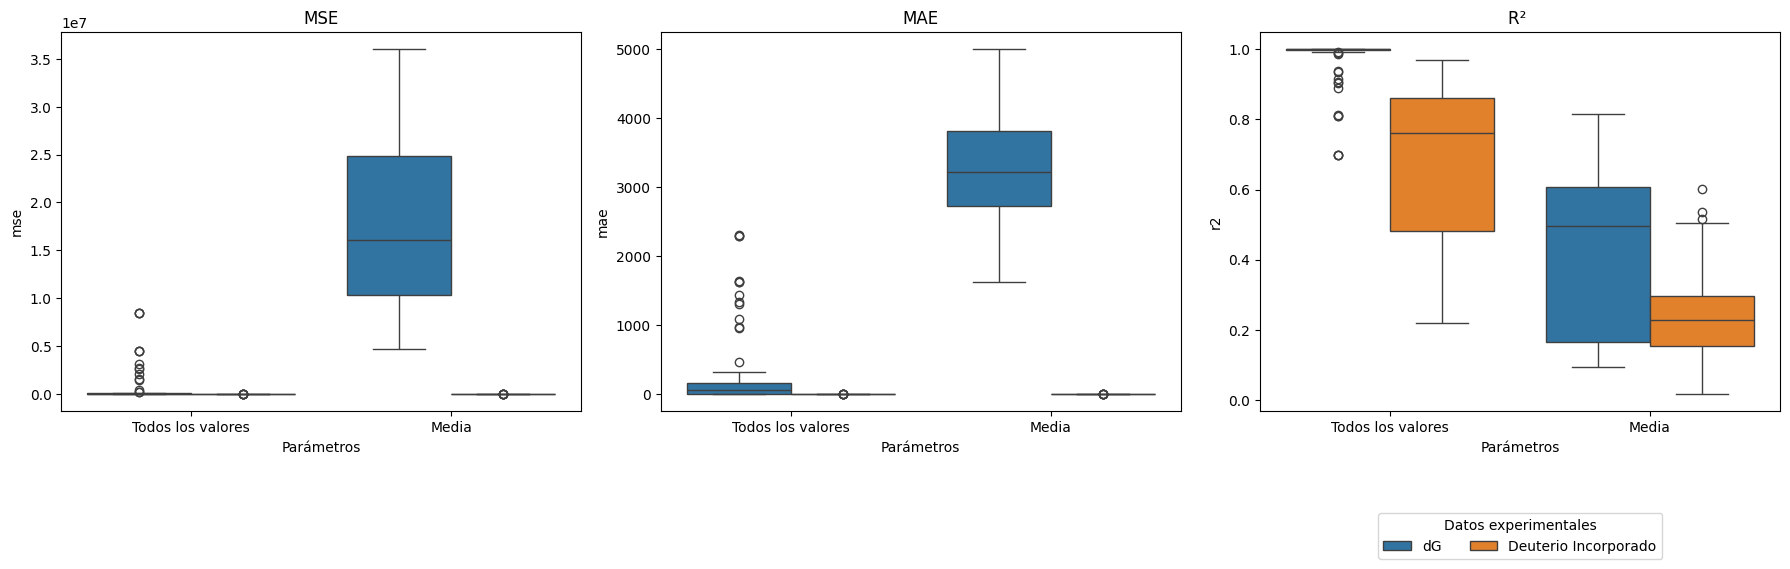

In [30]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=filtered_data_bayes, x='Parámetros', y='mse', hue='Datos experimentales')
plt.title('MSE')
plt.gca().legend_.remove()
plt.subplot(1, 3, 2)
sns.boxplot(data=filtered_data_bayes, x='Parámetros', y='mae', hue='Datos experimentales')
plt.title('MAE')
plt.gca().legend_.remove()
plt.subplot(1, 3, 3)
sns.boxplot(data=filtered_data_bayes, x='Parámetros', y='r2', hue='Datos experimentales')
plt.title('R² ')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2,title="Datos experimentales")
plt.tight_layout()
plt.show()

## Gibbs aa vs MD aa


In [2]:
files_names = [
    ['barnase_A', 3, ['0.25', '5.0', '480.0'],[1,2,3]],
    ['alpha_lactalbumin_apo', 2, ['0.25', '5.0',  '480.0'],[1,2,3]],
    [ 'm_lipin', 461, ['0.05', '5.0', '50.0'],[1,2,3]],
    ['alpha_spectrin', 1, ['0.005', '5.0', '5666.67'],[1,2,3]],
    ['enolase_apo', 1, ['0.25', '5.0', '480.0'],[1,2,3]],
    [ 'secB', 9, [ '0.167', '5.0', '100.000008'],[1,2,3]],
     [ 'VDR_AF_apo', 3, [ '0.5', '3.0', '30.0'],[1,2,3]],
    ['halm2_AF_apo',1,[ '0.5', '5.0',
       '240.000015'],[1,2,3]]
]

columns=['Protein','replicate','score_type','Y','Y_value','X','X_value','mse','mae','r2']
results_df=pd.DataFrame(columns=columns)
corr_data={}
results_df_peptide=pd.DataFrame(columns=columns)
corr_data_peptide={}
for base_name,nt_correction,time_values,replicates in files_names:
  for type_score in ['geometric']: 

    for replicate in replicates:
      trj_file = f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_rep_{replicate}_bonds_prot.pkl' 
      topology_file=f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_topology.csv'
      topology = pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_topology.csv')

      # Cálculo de los puentes de hidrógeno por residuo
      bonds=func.hbonds_per_res(trj_file,nt_correction,topology_file,type_score,em=False)
      D_uptake_noproc=pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/HDX_data/{base_name}_HDX.csv')
      D_uptake=func.unpivot_Duptake(D_uptake_noproc)
      gibbs=pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/gibbs/{base_name}_gibbs.csv',header=None)
      gibbs_processed=func.gibbs_proc(gibbs)
      results_df,corr_data=func.final_comparision_aa(D_uptake,gibbs_processed,bonds,time_values,type_score,replicate,base_name,results_df,corr_data)



    

/home/carlotaalv/Escritorio/TFM/tfm/functions_analysis.py:1307: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_rows], ignore_index=True)


In [5]:
with open('results_parameter_aa.pkl','wb') as file:
    pickle.dump(results_df,file)
with open('corr_data_parameter_aa.pkl','wb') as file:
    pickle.dump(corr_data,file)

In [6]:
with open('results_parameter_aa.pkl','rb') as file:
    aa_results=pickle.load(file)
with open('corr_data_parameter_aa.pkl','rb') as file:
    aa_coor=pickle.load(file)

In [8]:
min_y_gibbs = aa_results[aa_results['Y'] == 'gibbs']['Y_value'].apply(min).min()
max_y_gibbs = aa_results[aa_results['Y'] == 'gibbs']['Y_value'].apply(max).max()


print(f"Y range for gibsb: {min_y_gibbs} to {max_y_gibbs}")
range_gibbs=max_y_gibbs-min_y_gibbs
import seaborn as sns
import matplotlib.pyplot as plt
aa_results.columns=['Protein', 'replicate', 'Tipo de puntuación', 'Datos experimentales', 'Y_value', 'Parámetros','X_value', 'mse', 'mae', 'r2']
aa_results['Datos experimentales'] = aa_results['Datos experimentales'].replace({
    'gibbs': 'dG',
})
aa_results['Parámetros'] = aa_results['Parámetros'].replace({
    'mean': 'Media',
    'bayesian':'Todos los valores'
})


aa_results['Tipo de puntuación'] = aa_results['Tipo de puntuación'].apply(
    lambda x: ', '.join(map(str, x)) if isinstance(x, set) else str(x)
)
aa_results['Tipo de puntuación'] = aa_results['Tipo de puntuación'].replace({
    'geometric': 'Geométrica'
})

Y range for gibsb: 0.7053803827751196 to 10.72968899521531


In [10]:
summary = aa_results.groupby(['Parámetros', 'Datos experimentales']).agg(
    mse_mean=('mse', 'mean'),
    mse_std=('mse', 'std'),
    mae_mean=('mae', 'mean'),
    mae_std=('mae', 'std'),
    r2_mean=('r2', 'mean'),
    r2_std=('r2', 'std')
).reset_index()
summary.to_csv('aa_parameter_summary.csv')
summary

,Parámetros,Datos experimentales,mse_mean,mse_std,mae_mean,mae_std,r2_mean,r2_std
0,Media,dG,1.787879,0.996634,1.028209,0.365009,0.069070,0.059074
1,Todos los valores,dG,1.370879,0.841237,0.901301,0.340445,0.234142,0.246067
2,median,dG,1.857101,1.078080,1.050685,0.393572,0.044927,0.057083


## Comparision on info given by hbonds after energy minization vs MD


In [ ]:
files_names = [
    ['barnase_A', 3, ['0.25', '20.0', '480.0'],[2]],
    [ 'm_lipin', 461, ['0.05', '0.5', '5.0', '50.0'],[2]],
]
columns=['Protein','replicate','score_type','time_value','Y','Y_value','X','X_value','mse','mae','r2']


columns=['Protein','replicate','score_type','time_value','Y','Y_value','X','X_value','mse','mae','r2']
results_df=pd.DataFrame(columns=columns)
corr_data={}
results_df_em=pd.DataFrame(columns=columns)
corr_data_em={}
for base_name,nt_correction,time_values,replicates in files_names:
  for type_score in ['geometric','geometric_gauss','electrostatic']: 
    for replicate in replicates:
      trj_file = f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_rep_{replicate}_bonds_prot.pkl' 
      em_file = f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_rep_{replicate}_EM_bonds_prot.pkl' 
      topology_file=f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_topology.csv'
      topology = pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_topology.csv')

      bonds=func.hbonds_per_res(trj_file,nt_correction,topology_file,type_score,em=False)
      bonds_em=func.hbonds_per_res(em_file,nt_correction,topology_file,type_score,em=True)
      D_uptake_noproc=pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/HDX_data/{base_name}_HDX.csv')
      D_uptake=func.unpivot_Duptake(D_uptake_noproc)
      gibbs=pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/gibbs/{base_name}_gibbs.csv',header=None)
      gibbs_processed=func.gibbs_proc(gibbs)

      results_df,corr_data=func.final_comparision_peptidev2(D_uptake,gibbs_processed,bonds,time_values,type_score,replicate,base_name,results_df,corr_data)
      
      results_df_em,corr_data_em=func.final_comparision_em(D_uptake,gibbs_processed,bonds_em,time_values,type_score,replicate,base_name,results_df_em,corr_data_em)



/home/carlotaalv/Escritorio/TFM/tfm/functions_analysis.py:1181: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df= pd.concat([results_df, new_rows], ignore_index=True)
/home/carlotaalv/Escritorio/TFM/tfm/functions_analysis.py:1339: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df= pd.concat([results_df, new_rows], ignore_index=True)
/home/carlotaalv/mambaforge/envs/tfm/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:375: RuntimeWarning: invalid value encountered in sqrt

In [ ]:
with open('results_em.pkl','wb') as file:
    pickle.dump(results_df_em,file)
with open('corr_data_em.pkl','wb') as file:
    pickle.dump(corr_data_em,file)
with open('results_NOem.pkl','wb') as file:
    pickle.dump(results_df,file)
with open('corr_data_NOem.pkl','wb') as file:
    pickle.dump(corr_data,file)   



In [72]:
with open('results_em.pkl','rb') as file:
    results_em=pickle.load(file)
with open('corr_data_em.pkl','rb') as file:
    corr_data_em=pickle.load(file)
with open('results_NOem.pkl','rb') as file:
    results_NOem=pickle.load(file)
with open('corr_data_NOem.pkl','rb') as file:
    corr_NOEM=pickle.load(file)   


In [73]:
print(corr_data_em['barnase_A_geometric_2'].keys())
print(corr_NOEM['barnase_A_geometric_2'].keys())

dict_keys(['X_em', 'gibbs_peptide', 'deu_peptide', 'gibbs_em_pred', 'deu_em_pred'])
dict_keys(['X_bayesian', 'X_mean', 'gibbs_peptide', 'deu_peptide', 'gibbs_bayesian_pred', 'deu_bayesian_pred', 'gibbs_linear_pred', 'deu_lienar_pred'])


In [75]:

results_em.columns=['Protein', 'replicate', 'Tipo de puntuación', 'time_value', 'Datos experimentales', 'Y_value', 'Parámetros','X_value', 'mse', 'mae', 'r2']
results_em['Datos experimentales'] = results_em['Datos experimentales'].replace({
    'gibbs': 'dG',
    'D uptake': 'Deuterio Incorporado'
})
results_em['Parámetros'] = results_em['Parámetros'].replace({
    'median': 'Mediana',
    'mean': 'Media',
    'interquartile':'Interquartil',
    'quartile 75':'Quartil 75',
    'quartile 90':'Quartil 90',
    'mode':'Moda'
})
results_em['Tipo de puntuación'] = results_em['Tipo de puntuación'].replace({
    'geometric': 'Geométrica',
    'geometric_gauss': 'Gaussiana',
    'electrostatic':'Electrostática'
})

# Ensure 'score_type' is a string if it's a set
results_em['Tipo de puntuación'] = results_em['Tipo de puntuación'].apply(
    lambda x: ', '.join(map(str, x)) if isinstance(x, set) else str(x)
)
results_em['Tipo de puntuación'] = results_em['Tipo de puntuación'].replace({
    'geometric': 'Geométrica',
    'geometric_gauss': 'Gaussiana',
    'electrostatic':'Electrostática'
})
results_em_filt = results_em[results_em['Tipo de puntuación'] == 'Geométrica']


In [79]:

results_NOem.columns=['Protein', 'replicate', 'Tipo de puntuación', 'time_value', 'Datos experimentales', 'Y_value', 'Parámetros','X_value', 'mse', 'mae', 'r2']
results_NOem['Datos experimentales'] = results_NOem['Datos experimentales'].replace({
    'gibbs': 'dG',
    'D uptake': 'Deuterio Incorporado'
})
results_NOem['Parámetros'] = results_NOem['Parámetros'].replace({
    'mean': 'Media',
    'bayesian':'Todos los valores'
})
results_NOem['Tipo de puntuación'] = results_NOem['Tipo de puntuación'].apply(
    lambda x: ', '.join(map(str, x)) if isinstance(x, set) else str(x)
)
results_NOem['Tipo de puntuación'] = results_NOem['Tipo de puntuación'].replace({
    'geometric': 'Geométrica',
    'geometric_gauss': 'Gaussiana',
    'electrostatic':'Electrostática'
})
results_NOem_filt = results_NOem[results_NOem['Tipo de puntuación'] == 'Geométrica']

In [81]:

data = pd.concat([results_NOem_filt, results_em_filt])
data_mlipin=data[data['Protein']=='m_lipin']
data_barnase=data[data['Protein']=='barnase_A']

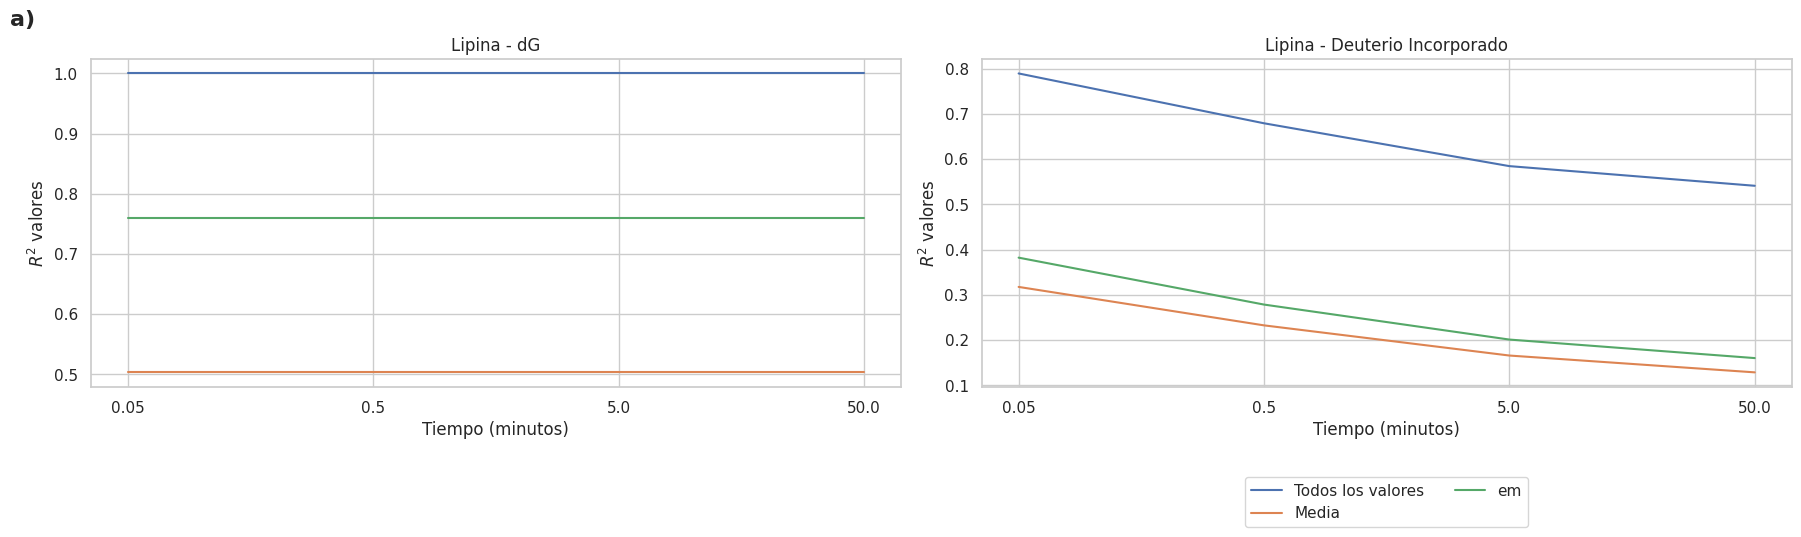

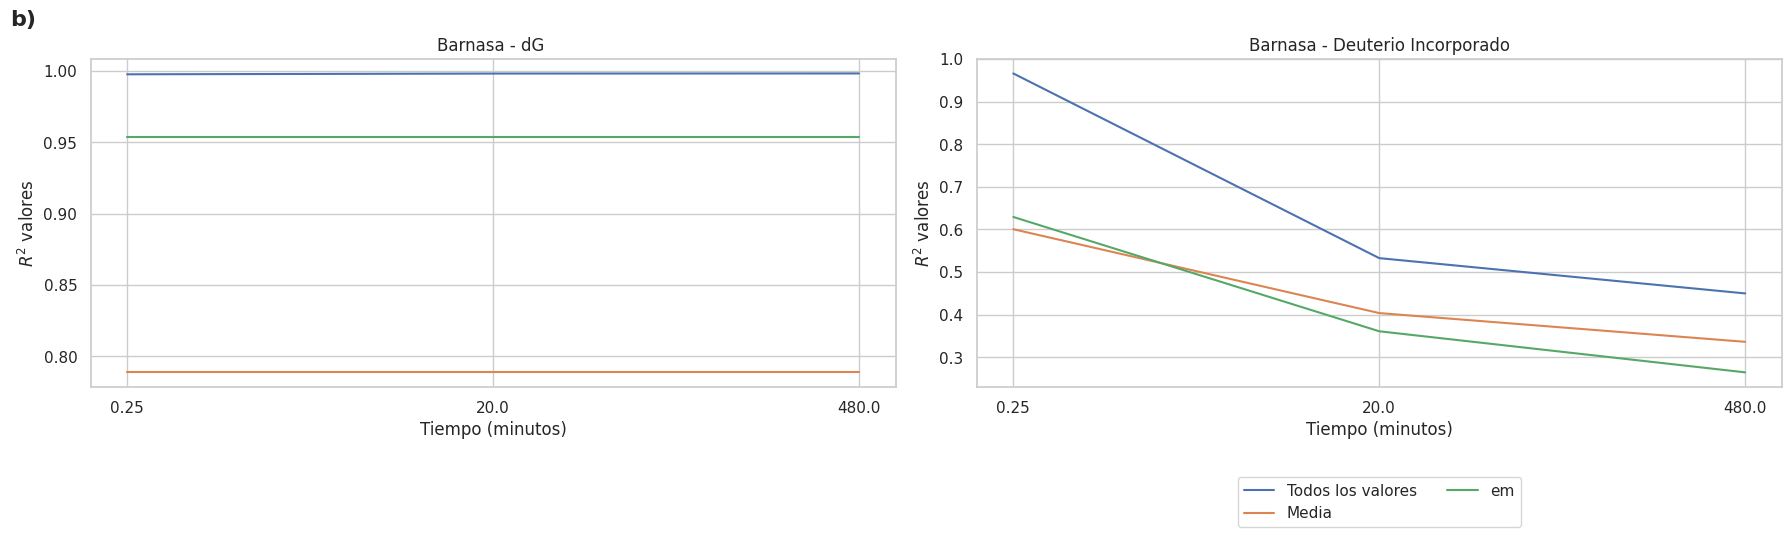

In [89]:
# Set style and figure size
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(18, 6)) 
ax1, ax2 = axs.flatten()  

sns.lineplot(data=data_mlipin[data_mlipin['Datos experimentales'] == 'dG'],
             x='time_value', y='r2', hue='Parámetros', markers=True, ax=ax1)
ax1.set_title('Lipina - dG')
ax1.set_xlabel('Tiempo (minutos)')
ax1.set_ylabel('$R^2$ valores')
ax1.grid(True)
ax1.text(-0.1, 1.1, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold')  

ax1.get_legend().remove()
sns.lineplot(data=data_mlipin[data_mlipin['Datos experimentales'] == 'Deuterio Incorporado'],
             x='time_value', y='r2', hue='Parámetros', markers=True, ax=ax2)
ax2.set_title('Lipina - Deuterio Incorporado')
ax2.set_xlabel('Tiempo (minutos)')
ax2.set_ylabel('$R^2$ valores')
ax2.grid(True)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)
plt.tight_layout()
plt.show()
#
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  #
ax1, ax2 = axs.flatten()  
sns.lineplot(data=data_barnase[data_barnase['Datos experimentales'] == 'dG'],
             x='time_value', y='r2', hue='Parámetros', markers=True, ax=ax1)
ax1.set_title('Barnasa - dG ')
ax1.set_xlabel('Tiempo (minutos)')
ax1.set_ylabel('$R^2$ valores')
ax1.grid(True)
ax1.text(-0.1, 1.1, 'b)', transform=ax1.transAxes, fontsize=16, fontweight='bold')  
ax1.get_legend().remove()

sns.lineplot(data=data_barnase[data_barnase['Datos experimentales'] == 'Deuterio Incorporado'],
             x='time_value', y='r2', hue='Parámetros', markers=True, ax=ax2)
ax2.set_title('Barnasa - Deuterio Incorporado')
ax2.set_xlabel('Tiempo (minutos)')
ax2.set_ylabel('$R^2$ valores')
ax2.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)
plt.tight_layout()
plt.show()




## Block functions

In [115]:
files_names = [
    ['barnase_A', 3, ['0.25', '20.0', '480.0'],[1,2,3]],
    ['alpha_lactalbumin_apo', 2, ['0.25', '20.0',  '480.0'],[1,2,3]],
    [ 'm_lipin', 461, ['0.05', '0.5', '5.0', '50.0'],[1,2,3]],
    ['alpha_spectrin', 1, ['0.005', '5.0', '5666.67'],[1,2,3]],
    ['enolase_apo', 1, ['0.25', '20.0', '480.0'],[1,2,3]],
    [ 'secB', 9, [ '0.167', '5.0', '100.000008'],[1,2,3]],
     [ 'VDR_AF_apo', 3, [ '0.5', '3.0', '30.0'],[1,2,3]],
    ['halm2_AF_apo',1,[ '0.5', '5.0',
       '240.000015'],[1,2,3]]
]
columns=['Protein','replicate','score_type','time_value','Y','X','mse','mae','r2']
results_df_bq1=pd.DataFrame(columns=columns)
corr_data_bq1={}
results_df_bq2=pd.DataFrame(columns=columns)
corr_data_bq2={}
results_df_bq3=pd.DataFrame(columns=columns)
corr_data_bq3={}
results_df_bq4=pd.DataFrame(columns=columns)
corr_data_bq4={}
results_df_bq5=pd.DataFrame(columns=columns)
corr_data_bq5={}
results_df_bq1_2=pd.DataFrame(columns=columns)
corr_data_bq1_2={}
results_df_bq1_3=pd.DataFrame(columns=columns)
corr_data_bq1_3={}
results_df_bq1_4=pd.DataFrame(columns=columns)
corr_data_bq1_4={}
results_df_bq1_5=pd.DataFrame(columns=columns)
corr_data_bq1_5={}

for base_name,nt_correction,time_values,replicates in files_names:
  for type_score in ['geometric']: 

    for replicate in replicates:
      trj_file = f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_rep_{replicate}_bonds_prot.pkl' 
      topology_file=f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_topology.csv'
      topology = pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/bonds/{base_name}_topology.csv')

      bonds=func.hbonds_per_res(trj_file,nt_correction,topology_file,type_score,em=False)
      D_uptake_noproc=pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/HDX_data/{base_name}_HDX.csv')
      D_uptake=func.unpivot_Duptake(D_uptake_noproc)
      gibbs=pd.read_csv(f'/home/carlotaalv/Escritorio/TFM/tfm/gibbs/{base_name}_gibbs.csv',header=None)
      gibbs_processed=func.gibbs_proc(gibbs)
      values_all=bonds
      values_block1=defaultdict(lambda:np.zeros(2000))
      values_block2=defaultdict(lambda:np.zeros(2000))
      values_block3=defaultdict(lambda:np.zeros(2000))
      values_block4=defaultdict(lambda:np.zeros(2000))
      values_block5=defaultdict(lambda:np.zeros(2001))
      values_block1_2=defaultdict(lambda:np.zeros(4000))
      values_block1_3=defaultdict(lambda:np.zeros(6000))
      values_block1_4=defaultdict(lambda:np.zeros(8000))
      values_block1_5=defaultdict(lambda:np.zeros(10001))
      for key in values_all.keys():
          for i in range(2000):
              values_block1[key][i]=values_all[key][i]
              values_block2[key][i]=values_all[key][2000+i]
              values_block3[key][i]=values_all[key][4000+i]
              values_block4[key][i]=values_all[key][6000+i]
              values_block5[key][i]=values_all[key][8000+i]
          values_block5[key][2000]=values_all[key][10000]
          for i in range(4000):
            values_block1_2[key][i]=values_all[key][i]
          for i in range(6000):
            values_block1_3[key][i]=values_all[key][i]
          for i in range(8000):
            values_block1_4[key][i]=values_all[key][i]
          for i in range(10001):
            values_block1_5[key][i]=values_all[key][i]

      results_df_bq1,corr_data_bq1=func.final_comparision_peptidev2(D_uptake,gibbs_processed,values_block1,time_values,type_score,replicate,base_name,results_df_bq1,corr_data_bq1,range_val=2000)

      results_df_bq2,corr_data_bq1=func.final_comparision_peptidev2(D_uptake,gibbs_processed,values_block2,time_values,type_score,replicate,base_name,results_df_bq2,corr_data_bq2,range_val=2000)

      results_df_bq3,corr_data_bq1=func.final_comparision_peptidev2(D_uptake,gibbs_processed,values_block3,time_values,type_score,replicate,base_name,results_df_bq3,corr_data_bq3,range_val=2000)

      results_df_bq4,corr_data_bq4=func.final_comparision_peptidev2(D_uptake,gibbs_processed,values_block4,time_values,type_score,replicate,base_name,results_df_bq4,corr_data_bq4,range_val=2000)

      results_df_bq5,corr_data_bq5=func.final_comparision_peptidev2(D_uptake,gibbs_processed,values_block5,time_values,type_score,replicate,base_name,results_df_bq5,corr_data_bq5,range_val=2001)
      
 
      results_df_bq1_2,corr_data_bq1_2=func.final_comparision_peptidev2(D_uptake,gibbs_processed,values_block1_2,time_values,type_score,replicate,base_name,results_df_bq1_2,corr_data_bq1_2,range_val=4000)

      results_df_bq1_3,corr_data_bq1_3=func.final_comparision_peptidev2(D_uptake,gibbs_processed,values_block1_3,time_values,type_score,replicate,base_name,results_df_bq1_3,corr_data_bq1_3,range_val=6000)

      results_df_bq1_4,corr_data_bq1_4=func.final_comparision_peptidev2(D_uptake,gibbs_processed,values_block1_4,time_values,type_score,replicate,base_name,results_df_bq1_4,corr_data_bq1_4,range_val=8000)

      results_df_bq1_5,corr_data_bq1_5=func.final_comparision_peptidev2(D_uptake,gibbs_processed,values_block1_5,time_values,type_score,replicate,base_name,results_df_bq1_5,corr_data_bq1_5)




/home/carlotaalv/Escritorio/TFM/tfm/functions_analysis.py:1181: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df= pd.concat([results_df, new_rows], ignore_index=True)
/home/carlotaalv/mambaforge/envs/tfm/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:375: RuntimeWarning: invalid value encountered in sqrt
  y_std = np.sqrt(sigmas_squared_data + (1.0 / self.alpha_))
/home/carlotaalv/Escritorio/TFM/tfm/functions_analysis.py:1181: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res

In [116]:
with open('results_bq1.pkl','wb') as file:
    pickle.dump(results_df_bq1,file)

with open('results_bq2.pkl','wb') as file:
    pickle.dump(results_df_bq2,file)
with open('corr_data_bq2.pkl','wb') as file:
    pickle.dump(corr_data_bq2,file)
with open('results_bq3.pkl','wb') as file:
    pickle.dump(results_df_bq3,file)
with open('corr_data_bq3.pkl','wb') as file:
    pickle.dump(corr_data_bq3,file)
with open('results_bq4.pkl','wb') as file:
    pickle.dump(results_df_bq4,file)
with open('corr_data_bq4.pkl','wb') as file:
    pickle.dump(corr_data_bq4,file)
with open('results_bq5.pkl','wb') as file:
    pickle.dump(results_df_bq5,file)
with open('corr_data_bq5.pkl','wb') as file:
    pickle.dump(corr_data_bq5,file)
with open('results_bq1_2.pkl','wb') as file:
    pickle.dump(results_df_bq1_2,file)
with open('corr_data_bq1_2.pkl','wb') as file:
    pickle.dump(corr_data_bq1_2,file)
with open('results_bq1_3.pkl','wb') as file:
    pickle.dump(results_df_bq1_3,file)
with open('corr_data_bq1_3.pkl','wb') as file:
    pickle.dump(corr_data_bq1_3,file)
with open('results_bq1_4.pkl','wb') as file:
    pickle.dump(results_df_bq1_4,file)
with open('corr_data_bq1_4.pkl','wb') as file:
    pickle.dump(corr_data_bq1_4,file)
with open('results_bq1_5.pkl','wb') as file:
    pickle.dump(results_df_bq1_5,file)
with open('corr_data_bq1_5.pkl','wb') as file:
    pickle.dump(corr_data_bq1_5,file)

In [102]:
with open('results_bq1.pkl','rb') as file:
    results_df_bq1=pickle.load(file)
with open('results_bq2.pkl','rb') as file:
    results_df_bq2=pickle.load(file)
with open('results_bq3.pkl','rb') as file:
    results_df_bq3=pickle.load(file)

with open('results_bq4.pkl','rb') as file:
    results_df_bq4=pickle.load(file)

with open('results_bq5.pkl','rb') as file:
    results_df_bq5=pickle.load(file)

with open('results_bq1_2.pkl','rb') as file:
    results_df_bq1_2=pickle.load(file)

with open('results_bq1_3.pkl','rb') as file:
    results_df_bq1_3=pickle.load(file)

with open('results_bq1_4.pkl','rb') as file:
    results_df_bq1_4=pickle.load(file)

with open('results_bq1_5.pkl','rb') as file:
    results_df_bq1_5=pickle.load(file)


In [121]:
results_df_bq1['Fotogramas'] = 'fotogramas [0-2000)'
results_df_bq2['Fotogramas'] = 'fotogramas [2000-4000)'
results_df_bq3['Fotogramas'] = 'fotogramas [4000-6000)'
results_df_bq4['Fotogramas'] = 'fotogramas [6000-8000)'
results_df_bq5['Fotogramas'] = 'fotogramas [8000-10000]'
results_df_bq1_2['Fotogramas'] = 'fotogramas [0-4000)'
results_df_bq1_3['Fotogramas'] = 'fotogramas [0-6000)'
results_df_bq1_4['Fotogramas'] = 'fotogramas [0-8000)'
results_df_bq1_5['Fotogramas'] = 'fotogramas [0-10000)'

combined_blocks_results_sep = pd.concat([
    results_df_bq1,
    results_df_bq2,
    results_df_bq3,
    results_df_bq4,
    results_df_bq5,
], ignore_index=True)

combined_blocks_results = pd.concat([
    results_df_bq1,
    results_df_bq1_2,
    results_df_bq1_3,
    results_df_bq1_4,
    results_df_bq1_5
], ignore_index=True)


combined_blocks_results.columns=['Protein', 'replicate', 'Tipo de puntuación', 'time_value', 'Datos experimentales', 'Parámetros','mse', 'mae', 'r2','Y_value','X_value','Fotogramas']
combined_blocks_results['Datos experimentales'] = combined_blocks_results['Datos experimentales'].replace({
    'gibbs': 'dG',
    'D uptake': 'Deuterio Incorporado'
})
combined_blocks_results['Parámetros'] = combined_blocks_results['Parámetros'].replace({
    'mean': 'Media',
    'bayesian':'Todos los valores'
})
combined_blocks_results['Tipo de puntuación'] = combined_blocks_results['Tipo de puntuación'].replace({
    'geometric': 'Geométrica',
})

# Ensure 'score_type' is a string if it's a set
combined_blocks_results['Tipo de puntuación'] = combined_blocks_results['Tipo de puntuación'].apply(
    lambda x: ', '.join(map(str, x)) if isinstance(x, set) else str(x)
)
combined_blocks_results['Tipo de puntuación'] = combined_blocks_results['Tipo de puntuación'].replace({
    'geometric': 'Geométrica',
    'geometric_gauss': 'Gaussiana',
})
combined_blocks_results_filt= combined_blocks_results[combined_blocks_results['Tipo de puntuación'] == 'Geométrica']
combined_blocks_results_filt_bayesian=combined_blocks_results_filt[combined_blocks_results_filt['Parámetros']=='Todos los valores']
combined_blocks_results_filt_mean=combined_blocks_results_filt[combined_blocks_results_filt['Parámetros']=='Media']

#############################################333

combined_blocks_results_sep.columns=['Protein', 'replicate', 'Tipo de puntuación', 'time_value', 'Datos experimentales', 'Parámetros','mse', 'mae', 'r2','Y_value','X_value','Fotogramas']
combined_blocks_results_sep['Datos experimentales'] = combined_blocks_results_sep['Datos experimentales'].replace({
    'gibbs': 'dG',
    'D uptake': 'Deuterio Incorporado'
})
combined_blocks_results_sep['Parámetros'] = combined_blocks_results_sep['Parámetros'].replace({
    'mean': 'Media',
    'bayesian':'Todos los valores'
})
combined_blocks_results_sep['Tipo de puntuación'] = combined_blocks_results_sep['Tipo de puntuación'].replace({
    'geometric': 'Geométrica',
})

# Ensure 'score_type' is a string if it's a set
combined_blocks_results_sep['Tipo de puntuación'] = combined_blocks_results_sep['Tipo de puntuación'].apply(
    lambda x: ', '.join(map(str, x)) if isinstance(x, set) else str(x)
)
combined_blocks_results_sep['Tipo de puntuación'] = combined_blocks_results_sep['Tipo de puntuación'].replace({
    'geometric': 'Geométrica',
    'geometric_gauss': 'Gaussiana',
})
combined_blocks_results_filt_Sep= combined_blocks_results_sep[combined_blocks_results_sep['Tipo de puntuación'] == 'Geométrica']
combined_blocks_results_filt_bayesian_Sep=combined_blocks_results_filt_Sep[combined_blocks_results_filt_Sep['Parámetros']=='Todos los valores']
combined_blocks_results_filt_mean_Sep=combined_blocks_results_filt_Sep[combined_blocks_results_filt_Sep['Parámetros']=='Media']

/tmp/ipykernel_5756/2300253881.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
/tmp/ipykernel_5756/2300253881.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


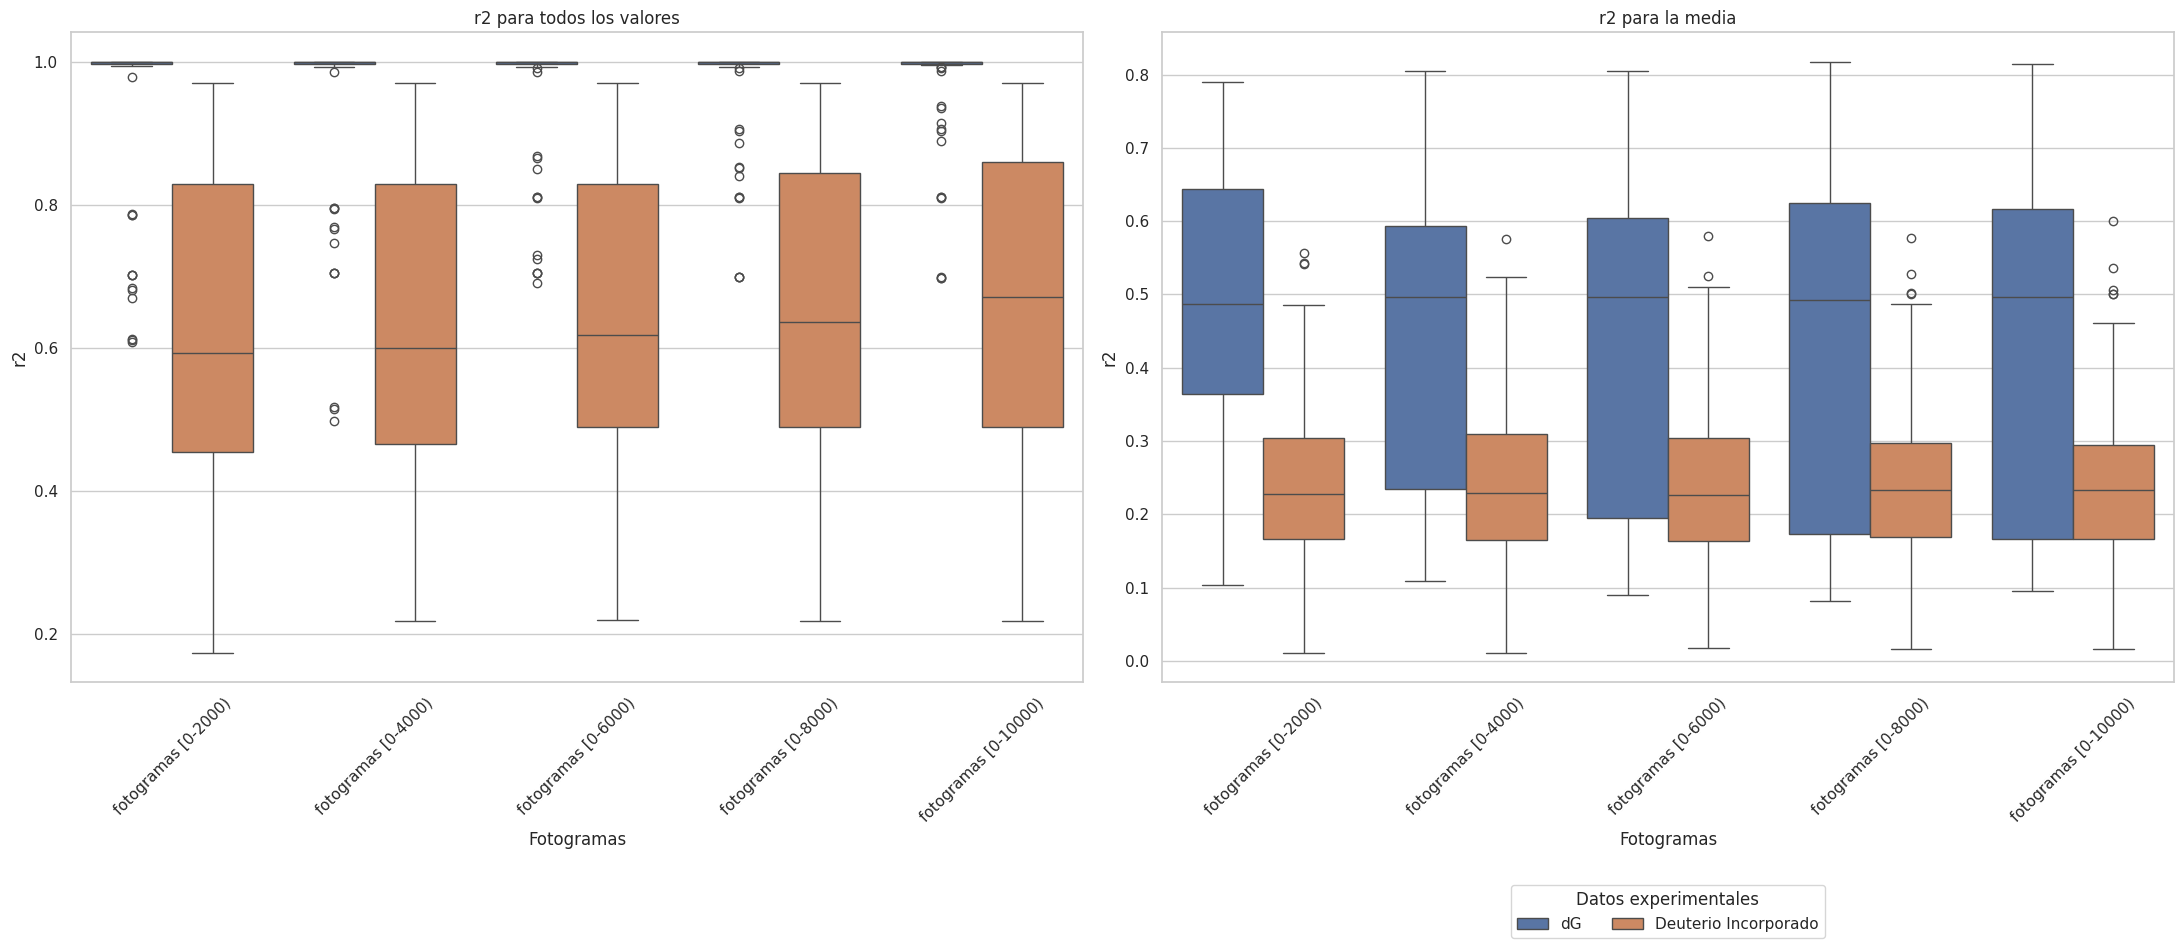

In [139]:

sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(22, 10))  # 1 fila, 2 columnas
ax1, ax2 = axs.flatten()  # Desempaquetar los ejes

sns.boxplot(data=combined_blocks_results_filt_bayesian, x='Fotogramas', y='r2', hue='Datos experimentales', ax=ax1)
ax1.set_title('r2 para todos los valores')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.get_legend().remove()

sns.boxplot(data=combined_blocks_results_filt_mean, x='Fotogramas', y='r2', hue='Datos experimentales', ax=ax2)
ax2.set_title('r2 para la media')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2, labels2, loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=2,title="Datos experimentales")

plt.tight_layout()

plt.show()

/tmp/ipykernel_5756/3826443320.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
/tmp/ipykernel_5756/3826443320.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


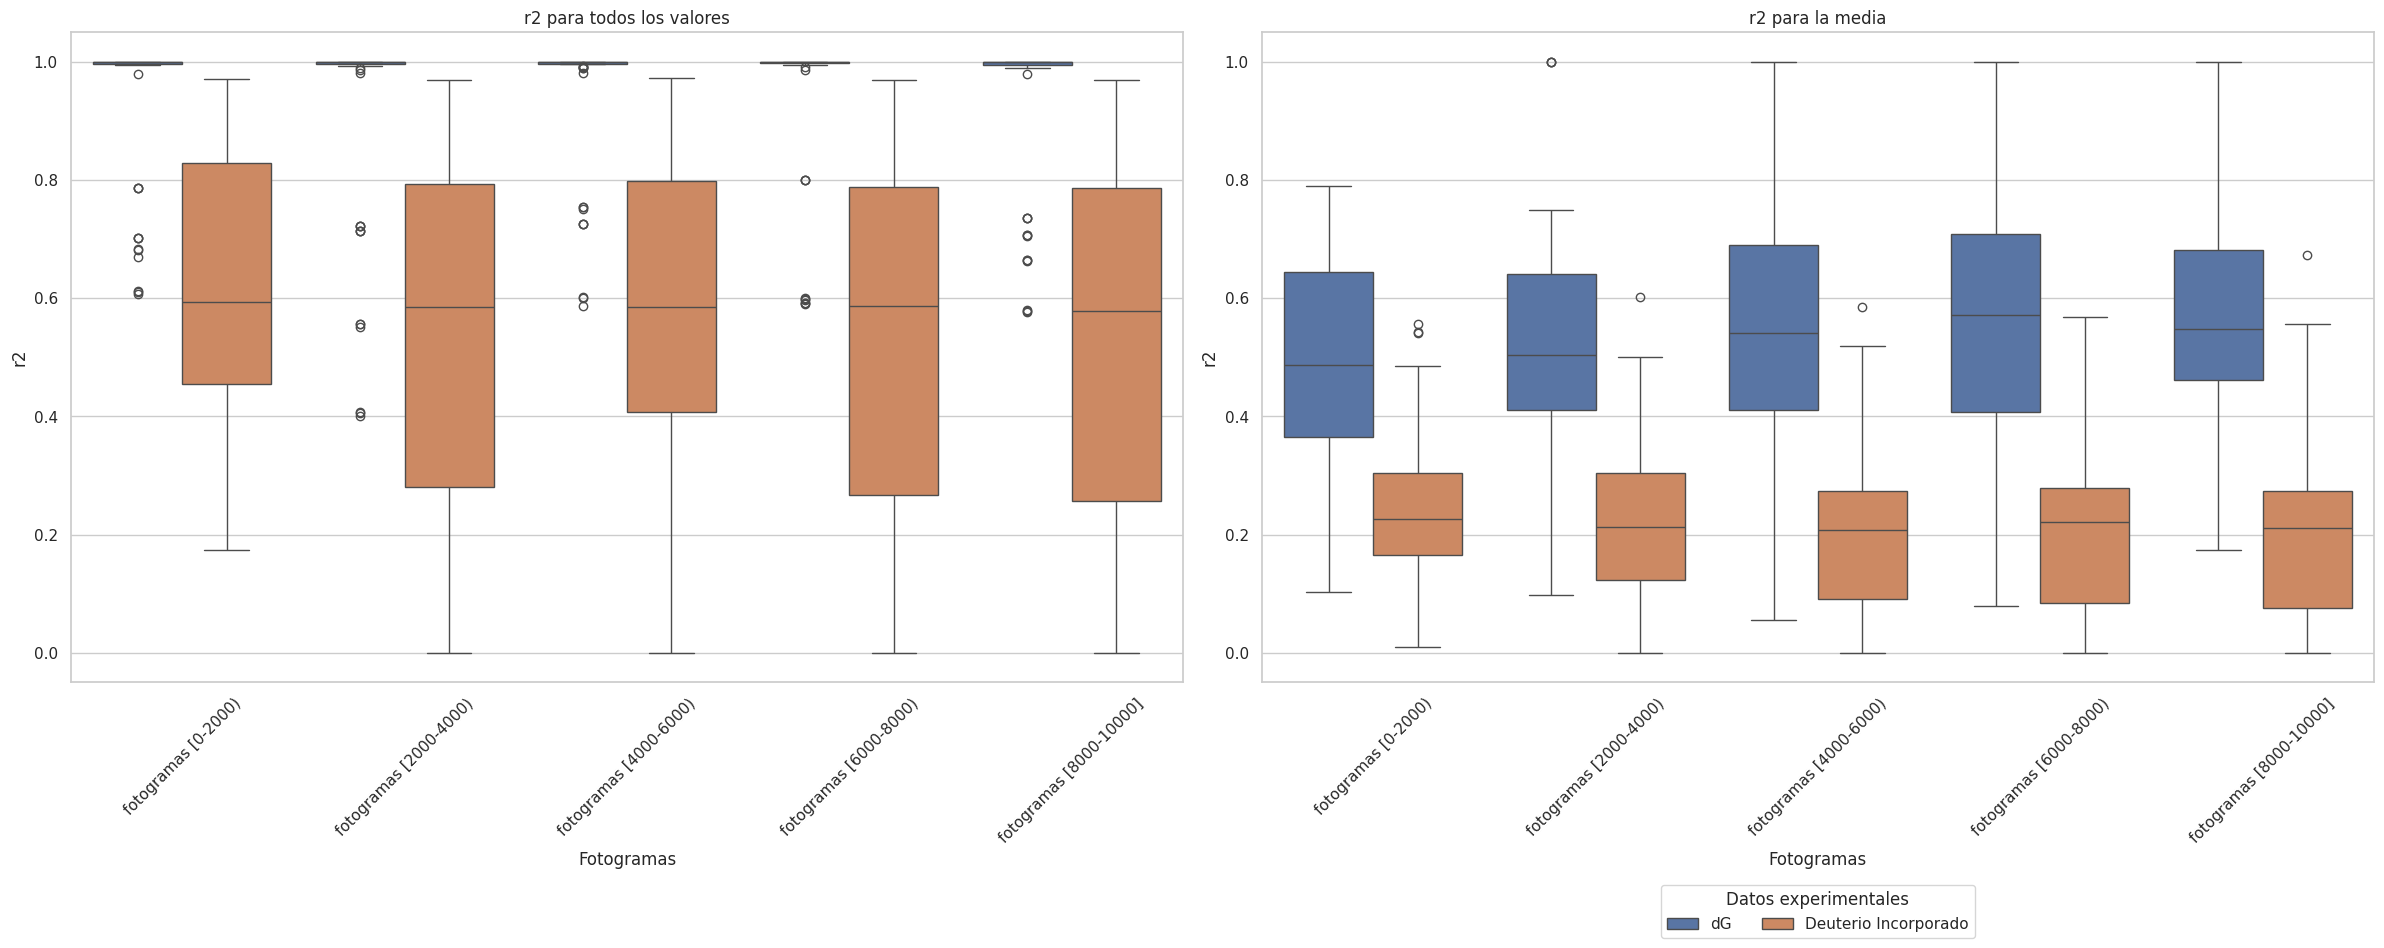

In [137]:

sns.set(style="whitegrid")

# Crear figura y ejes
fig, axs = plt.subplots(1, 2, figsize=(24, 10))  # 1 fila, 2 columnas
ax1, ax2 = axs.flatten()  # Desempaquetar los ejes

# Gráfico 1: r2 para todos los valores
sns.boxplot(data=combined_blocks_results_filt_bayesian_Sep, x='Fotogramas', y='r2', hue='Datos experimentales', ax=ax1)
ax1.set_title('r2 para todos los valores')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.get_legend().remove()

# Gráfico 2: r2 para la media
sns.boxplot(data=combined_blocks_results_filt_mean_Sep, x='Fotogramas', y='r2', hue='Datos experimentales', ax=ax2)
ax2.set_title('r2 para la media')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2,title="Datos experimentales")
plt.tight_layout()
plt.show()
